In [2]:
import os
import warnings 
warnings.filterwarnings("ignore")

import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv(r"StudentsPerformance.csv")

In [4]:
%pwd

'e:\\1. Projects\\New folder\\End-to-End-ML-Project\\End-to-End-ML-Project\\Research'

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.shape

(1000, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [23]:
def basic_info(data):
    print(f"The number of rows are: {data.shape[0]} and number of cols are: {data.shape[1]}")
    print("---------------------------------")

    print(f"Null values:\n{data.isna().sum()}")
    print("---------------------------------")

    print(f"Duplicate values:\n{data.duplicated().sum()}")
    print("---------------------------------")

    print(f"Number of unique values:\n{data.nunique()} ")
    print("---------------------------------")
    

    print(f"Basic information about data is: {data.info()}")
    print("---------------------------------")

    print(f"The basic description is:\n{data.describe()}")
    


In [26]:
basic_info(data)

The number of rows are: 1000 and number of cols are: 8
---------------------------------
Null values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
---------------------------------
Duplicate values:
0
---------------------------------
Number of unique values:
gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64 
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------               

In [29]:
# Numerical and categorical features

numeric_features = [feat for feat in data.columns if data[feat].dtype != 'O']
cat_features = [feat for feat in data.columns if data[feat].dtype == 'O']

In [34]:
print(f"{numeric_features}, num = {len(numeric_features)}")
print(f"{cat_features}, num = {len(cat_features)}")


['math score', 'reading score', 'writing score'], num = 3
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], num = 5


In [35]:
# adding some new features

data['total_marks'] = data['math score'] + data ['reading score'] + data['writing score']

data['average'] = data['total_marks']/3

In [36]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_marks', 'average'],
      dtype='object')

In [49]:
data.rename(columns={'race/ethnicity': 'race_ethinicity', 'parental level of education': 'parental_level_of_education',
                     'test preparation course' : 'test_preparation_course', 'math score': 'math_score',
                     'reading score' : 'reading_score', 'writing score': 'writing_score'},inplace = True)

In [50]:
_

,gender,race_ethinicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [51]:
data.columns

Index(['gender', 'race_ethinicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_marks', 'average'],
      dtype='object')

In [52]:
data.sample(10)

,gender,race_ethinicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average
164,female,group E,master's degree,standard,none,81,92,91,264,88.000000
283,female,group D,some college,free/reduced,completed,70,78,78,226,75.333333
311,male,group B,bachelor's degree,standard,none,66,60,57,183,61.000000
496,female,group C,some college,standard,none,54,48,52,154,51.333333
810,male,group A,some high school,standard,none,51,31,36,118,39.333333
413,male,group B,some high school,standard,completed,63,67,67,197,65.666667
589,female,group A,some high school,standard,none,48,66,65,179,59.666667
197,male,group E,high school,free/reduced,none,55,56,51,162,54.000000
187,male,group D,some high school,standard,completed,62,66,68,196,65.333333
761,female,group D,some high school,standard,none,48,58,54,160,53.333333


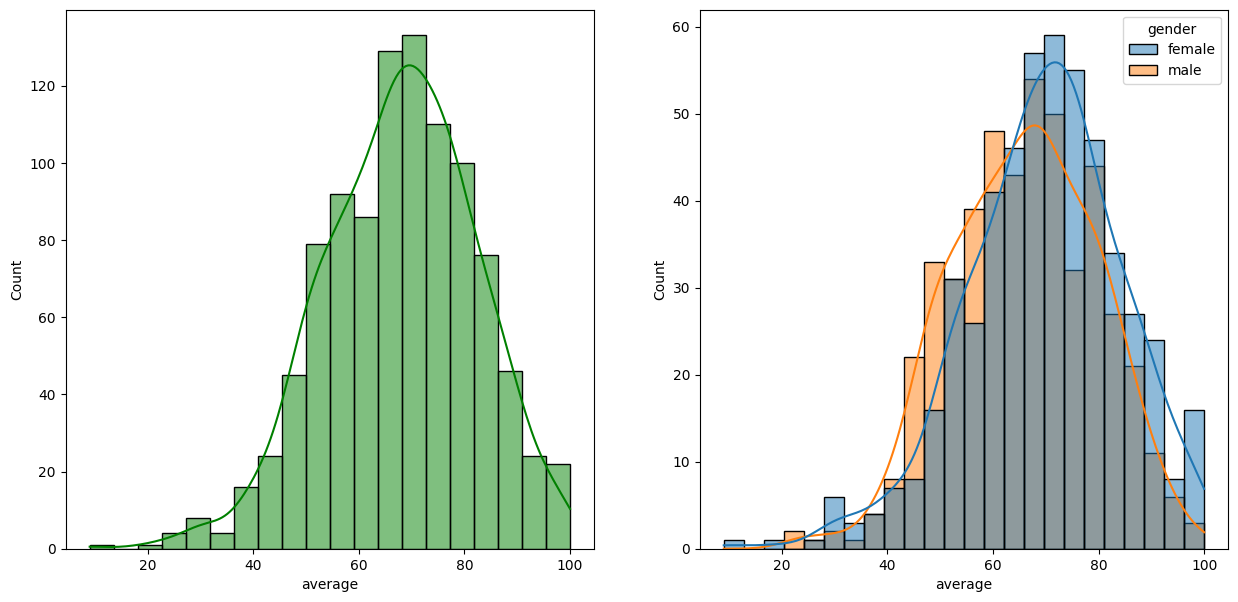

In [53]:
# visualization

fig, axes = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)

sns.histplot(data= data, x = 'average', bins=20, kde =True,color = 'g')
plt.subplot(122)

sns.histplot(data = data, x='average', kde =True, hue = 'gender')

plt.show()